#### Loading the data from csv using pandas


In [1]:
import pandas as pd

In [2]:
iris_data = pd.read_csv("IRIS.csv")
iris_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### checking the shape of the data and the information

In [3]:
iris_data.shape

(150, 5)

In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Using label encoding to covert the species

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
Label_encode = LabelEncoder()
labels = Label_encode.fit_transform(iris_data.species)
iris_data['target'] = labels

In [7]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


#### Iris_Setosa ===> 0
#### Iris_versicolor ===> 1
#### Iris_virginica ===> 2

In [8]:
data = iris_data.drop(columns='species', axis=1)

In [9]:
data

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### Data visualization

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style = 'dark')


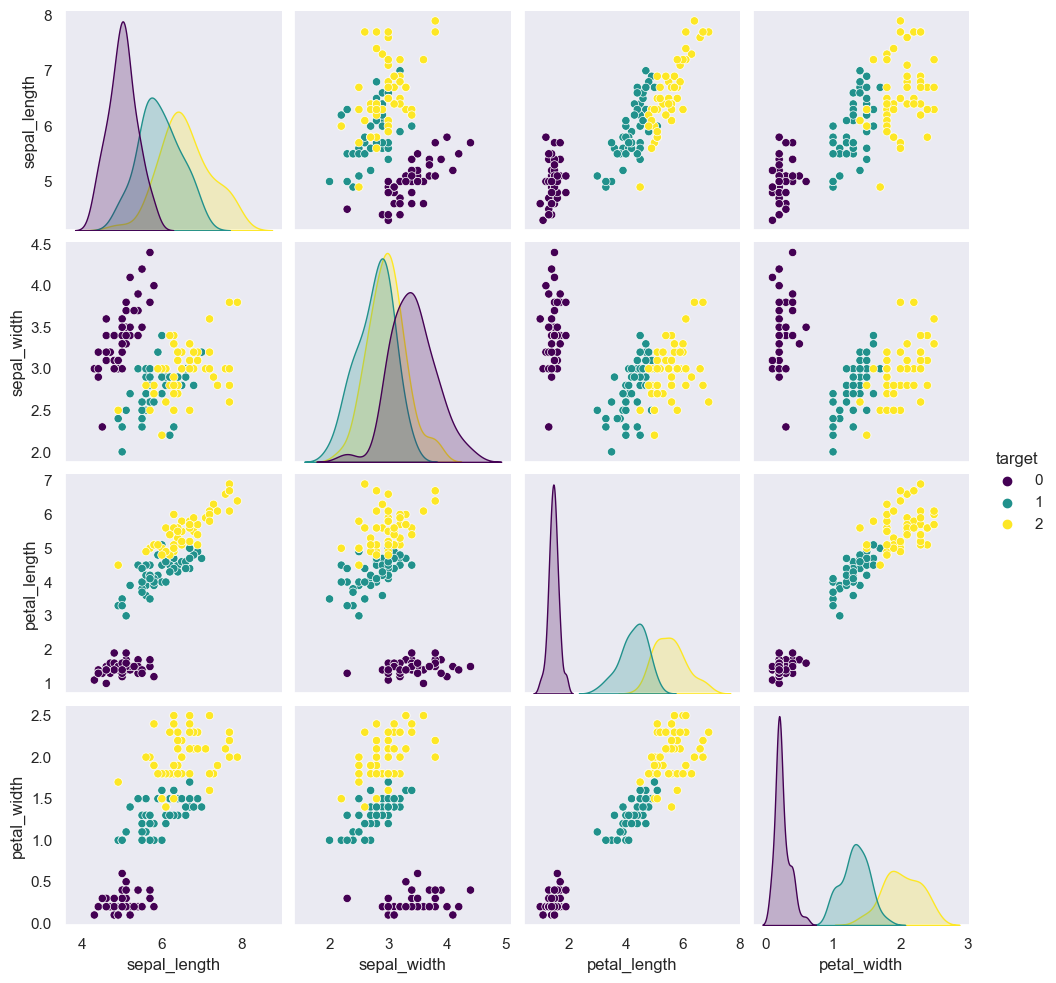

In [11]:
sns.pairplot(data, hue='target', palette='viridis')

#### splitting the data into features and target

In [12]:
x = data.drop(columns = 'target', axis = 1)
y = data['target']

### Using Cross validation
##### Cross validation is used here because it provides a more robust estimae of a model"s performance by splitting the data into multiple subsets

In [13]:
##### import multiple model to select the one with the highest accuracy

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [15]:
models = [LogisticRegression(max_iter=1000), DecisionTreeClassifier(),SVC(kernel='linear'),SVC(kernel='poly'),SVC(kernel='rbf'),SVC(kernel='sigmoid'), KNeighborsClassifier(),RandomForestClassifier(random_state=0)]

#definiing a class
def model_comparison():
    for model in models:
        cv_score = cross_val_score(model, x, y, cv = 5)
        mean_accuracy = sum(cv_score)/len(cv_score)
        print('The accuracy of ', model, 'is : ', round(mean_accuracy*100, 2), '%')
        print('--------------------------------------------------------------')

In [16]:
model_comparison()

The accuracy of  LogisticRegression(max_iter=1000) is :  97.33 %
--------------------------------------------------------------
The accuracy of  DecisionTreeClassifier() is :  96.0 %
--------------------------------------------------------------
The accuracy of  SVC(kernel='linear') is :  98.0 %
--------------------------------------------------------------
The accuracy of  SVC(kernel='poly') is :  98.0 %
--------------------------------------------------------------
The accuracy of  SVC() is :  96.67 %
--------------------------------------------------------------
The accuracy of  SVC(kernel='sigmoid') is :  6.67 %
--------------------------------------------------------------
The accuracy of  KNeighborsClassifier() is :  97.33 %
--------------------------------------------------------------
The accuracy of  RandomForestClassifier(random_state=0) is :  96.67 %
--------------------------------------------------------------


#### from the model comparison, we can see that support vector classifier for linear and poly  has the highest accuracy so we are going to pick svc(kernel='linear)
##### doing train test split with svc

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, stratify=y, random_state=2)

In [19]:
#training the model
classifier = SVC(kernel='linear')
#training the support vector machine
classifier.fit(x_train, y_train)
#model evaluation
x_train_pred = classifier.predict(x_train)
training_accuracy = accuracy_score(x_train_pred, y_train)
training_value = round(training_accuracy*100, 2)
print('The accuracy of is  ', training_value, '%')


The accuracy of is   99.17 %


In [20]:
#making a predictive system
import numpy as np
input_data = (3.2, 3.4, 4.1, 4.3)
input_array=np.asarray(input_data)
#reshape
input_array_reshape = input_array.reshape(1,-1)
prediction= classifier.predict(input_array_reshape)
print(prediction)

if (prediction[0] == 0):
    print('The flower is iris Setosa')
elif (prediction == 1):
    print('The flower is iris versicolor')
else:
    print('The flower is iris virginica')

[2]
The flower is iris virginica


c:\Users\Masterkim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
